# This example shows how to create a bunch from an arbitrary beam matrix

In [1]:
import RF_Track as RFT
import numpy as np
import matplotlib.pyplot as plt

### Create a 50 pC bunch at 100 MeV/$c$, using 1000 macroparticles

In [2]:
# Define key quantities
P_ref = 100 # MeV/c reference momentum
Q = 50 * RFT.pC # e, total bunch charge

Creates particles according to a random Gaussian distribution in X and Y, and 0 angles

In [3]:
N = 1000 # number of particles

# Initialise vector columns
O = np.zeros(N) # define a column vector of zeros
I = np.ones(N) # define a column vector of ones
X = np.random.randn(N) # mm, column vector of Gaussian-distributed positions
Y = np.random.randn(N) # mm, column vector of Gaussian-distributed positions

# create beam matrix with the phase space
M = np.array([X,O,Y,O,O,P_ref*I]).T # Bunch6d %x %xp %y %yp %t %P

In [4]:
M[0:9,:]

array([[-3.77428947e-01,  0.00000000e+00, -1.18586270e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+02],
       [-1.42818275e-01,  0.00000000e+00, -1.85907337e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+02],
       [ 5.65794052e-01,  0.00000000e+00,  6.64069647e-03,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+02],
       [ 2.40653335e-01,  0.00000000e+00, -1.56707770e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+02],
       [-8.32054468e-01,  0.00000000e+00,  7.00375011e-01,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+02],
       [-1.46653756e+00,  0.00000000e+00,  1.17884731e-01,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+02],
       [ 9.72465663e-01,  0.00000000e+00, -1.15593523e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+02],
       [ 3.80133431e-01,  0.00000000e+00, -5.60791198e-01,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+02],
       [-1.01346179e+00,  0.00000000e+00, -1.118

In [5]:
dt = 1 / RFT.ns

To create a bunch, use the RF-Track Bunch6d constructor, which takes
* the particle mass, in mm/$c$
* the bunch charge, expressed as number of particles
* the charge of the single particle in units of $e$
* the beam matrix $M$

In [6]:
B0 = RFT.Bunch6d(RFT.electronmass, Q, -1, M)

Text(0, 0.5, 'y [mm]')

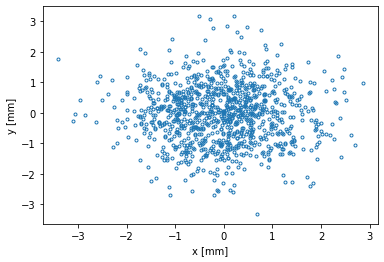

In [7]:
M0 = B0.get_phase_space ('%x %xp %y %yp')
plt.plot(M0[:,0], M0[:,2], '.', mfc='none')
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')

In [8]:
M0 = B0.get_phase_space('%Px %Py')
M

array([[-3.77428947e-01,  0.00000000e+00, -1.18586270e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+02],
       [-1.42818275e-01,  0.00000000e+00, -1.85907337e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+02],
       [ 5.65794052e-01,  0.00000000e+00,  6.64069647e-03,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+02],
       ...,
       [ 8.24992587e-01,  0.00000000e+00,  3.99941064e-01,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+02],
       [ 8.51441276e-01,  0.00000000e+00,  6.24737417e-01,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+02],
       [-1.85408667e+00,  0.00000000e+00,  5.85105967e-02,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+02]])

In [9]:
M0[0:9,:]

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [10]:
B0_displaced = B0.displaced(1, 0, 0)

In [11]:
B0_displaced.get_info().mean_x

0.9452350631121024